In [1]:
import pandas as pd
#import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn import svm
import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import *
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.preprocessing import StandardScaler,LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn import preprocessing


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
kf = KFold(n_splits=10)

In [2]:
d_1 = pd.read_csv("features_extraction_Xception.csv")
d_2 = pd.read_csv("features_extraction_VGG16.csv")
d_3 = pd.read_csv("features_extraction_ResNet50.csv")
d_4 = pd.read_csv("features_extraction_InceptionV3.csv")
d_5 = pd.read_csv("features_extraction_DenseNet201.csv")

In [3]:
labels=d_1['label'].value_counts()

fig = px.pie(d_1, values=labels, names=labels.index)
fig.show()

In [24]:
def My_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)
    le = preprocessing.LabelEncoder()
    le.fit(y_test)
    test_labels_encoded = le.transform(y_test)
    le.fit(y_train)
    train_labels_encoded = le.transform(y_train)
    print(X_train.shape[1])
    model=Sequential()
    model.add(Dense(512,input_shape=(X_train.shape[1],),activation='relu'))
    model.add(Dropout(0.20))

    model.add(Dense(units=256,activation='relu'))
    model.add(Dropout(0.20))

    model.add(Dense(units=128,activation='relu'))
    model.add(Dropout(0.10))

    model.add(Dense(units=7,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    mc = ModelCheckpoint('sayel', monitor='val_loss', mode='min', verbose=1)
    history_1=model.fit(X_train,train_labels_encoded,callbacks = [es,mc],batch_size=10, epochs=500,
                        validation_split=0.20)
    plt.plot(history_1.history['accuracy'])
    plt.plot(history_1.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    predict_x=model.predict(X_test) 
    Y_pred=np.argmax(predict_x,axis=1)
    #Y_pred=model.predict_classes(X_test)
    Scores=metrics_scores(Y_pred,y_test,le)
    return Scores

In [25]:
def metrics_scores(y_pred,y_test,le):
    prediction1 = le.inverse_transform(y_pred)
    print ("Accuracy = ", metrics.accuracy_score(y_test, prediction1))
    print ("f1 micro = ", metrics.f1_score(y_test, prediction1,average='micro'))
    print ("f1 macro = ", metrics.f1_score(y_test, prediction1,average='macro'))
    print ("f1 all = ", metrics.f1_score(y_test, prediction1,average=None))
    print ("prec micro = ", metrics.precision_score(y_test, prediction1,average='micro'))
    print ("prec macro = ", metrics.precision_score(y_test, prediction1,average='macro'))
    print ("prec all = ", metrics.precision_score(y_test, prediction1,average=None))

    print ("recall micro = ", metrics.recall_score(y_test, prediction1,average='micro'))
    print ("recall macro = ", metrics.recall_score(y_test, prediction1,average='macro'))
    print ("recall all = ", metrics.recall_score(y_test, prediction1,average=None))

    cm = confusion_matrix(y_test, prediction1)
    #print(cm)
    
    print(sns.heatmap(cm, annot=True))


2049
Epoch 1/500
79/82 [===========================>..] - ETA: 0s - loss: 5.9602 - accuracy: 0.3278
Epoch 1: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 5s 41ms/step - loss: 5.8587 - accuracy: 0.3248 - val_loss: 1.1251 - val_accuracy: 0.6078
Epoch 2/500
81/82 [============================>.] - ETA: 0s - loss: 1.6016 - accuracy: 0.4741
Epoch 2: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 3s 33ms/step - loss: 1.6005 - accuracy: 0.4743 - val_loss: 0.9772 - val_accuracy: 0.7157
Epoch 3/500
79/82 [===========================>..] - ETA: 0s - loss: 1.1531 - accuracy: 0.5722
Epoch 3: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 3s 36ms/step - loss: 1.1456 - accuracy: 0.5735 - val_loss: 0.8724 - val_accuracy: 0.7451
Epoch 4/500
81/82 [============================>.] - ETA: 0s - loss: 0.9785 - accur

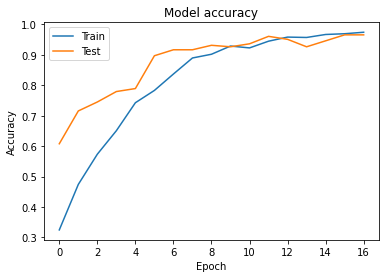

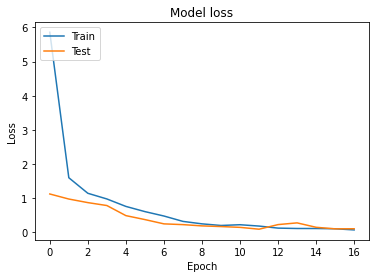

11/11 [==============================] - 0s 5ms/step
Accuracy =  0.9823529411764705
f1 micro =  0.9823529411764705
f1 macro =  0.982824376425689
f1 all =  [1.         0.98550725 0.96969697 0.98113208 0.97979798 0.96363636
 1.        ]
prec micro =  0.9823529411764705
prec macro =  0.9864378478664193
prec all =  [1.         0.97142857 1.         1.         0.97       0.96363636
 1.        ]
recall micro =  0.9823529411764705
recall macro =  0.9796531022221299
recall all =  [1.         1.         0.94117647 0.96296296 0.98979592 0.96363636
 1.        ]
AxesSubplot(0.125,0.125;0.62x0.755)


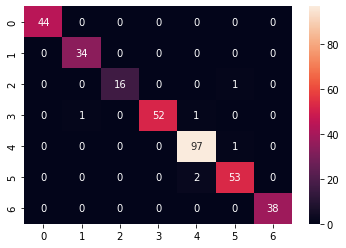

In [26]:
X_1 = d_1.drop(columns = ['label']).values
y_1 = d_1['label'].values
Scores=My_model(X_1,y_1)



513
Epoch 1/500
75/82 [==========================>...] - ETA: 0s - loss: 9.7890 - accuracy: 0.2813 
Epoch 1: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 4s 33ms/step - loss: 9.2632 - accuracy: 0.2917 - val_loss: 2.2223 - val_accuracy: 0.3873
Epoch 2/500
82/82 [==============================] - ETA: 0s - loss: 2.3121 - accuracy: 0.4020
Epoch 2: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 2s 28ms/step - loss: 2.3121 - accuracy: 0.4020 - val_loss: 1.2646 - val_accuracy: 0.4755
Epoch 3/500
78/82 [===========================>..] - ETA: 0s - loss: 1.7090 - accuracy: 0.4923
Epoch 3: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 2s 28ms/step - loss: 1.6818 - accuracy: 0.4975 - val_loss: 1.0701 - val_accuracy: 0.6912
Epoch 4/500
76/82 [==========================>...] - ETA: 0s - loss: 1.3295 - accur

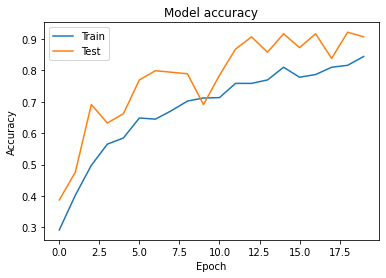

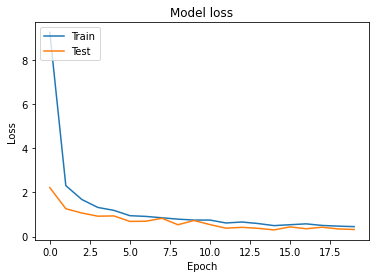

11/11 [==============================] - 0s 4ms/step
Accuracy =  0.8794117647058823
f1 micro =  0.8794117647058822
f1 macro =  0.7706251637054523
f1 all =  [0.9        0.81967213 0.         1.         0.86877828 0.99236641
 0.81355932]
prec micro =  0.8794117647058823
prec macro =  0.7743637976929902
prec all =  [0.97826087 0.71428571 0.         1.         0.768      1.
 0.96      ]
recall micro =  0.8794117647058823
recall macro =  0.7836575189516367
recall all =  [0.83333333 0.96153846 0.         1.         1.         0.98484848
 0.70588235]


/Users/sayel/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sayel/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



AxesSubplot(0.125,0.125;0.62x0.755)


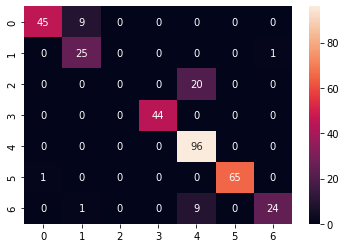

In [27]:
X_2 = d_2.drop(columns = ['label']).values
y_2 = d_2['label'].values
Scores=My_model(X_2,y_2)



2049
Epoch 1/500
80/82 [============================>.] - ETA: 0s - loss: 6.7710 - accuracy: 0.2900
Epoch 1: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 4s 36ms/step - loss: 6.7011 - accuracy: 0.2941 - val_loss: 1.5419 - val_accuracy: 0.4755
Epoch 2/500
81/82 [============================>.] - ETA: 0s - loss: 1.8357 - accuracy: 0.3778
Epoch 2: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 3s 34ms/step - loss: 1.8307 - accuracy: 0.3775 - val_loss: 1.2075 - val_accuracy: 0.5147
Epoch 3/500
82/82 [==============================] - ETA: 0s - loss: 1.4163 - accuracy: 0.4436
Epoch 3: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 3s 35ms/step - loss: 1.4163 - accuracy: 0.4436 - val_loss: 1.1164 - val_accuracy: 0.4265
Epoch 4/500
80/82 [============================>.] - ETA: 0s - loss: 1.2576 - accur

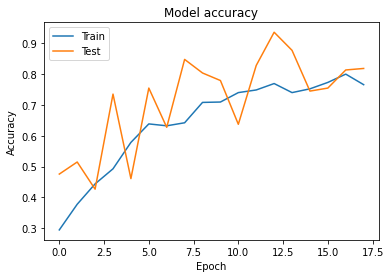

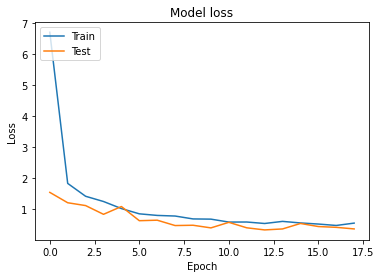

11/11 [==============================] - 0s 4ms/step
Accuracy =  0.8529411764705882
f1 micro =  0.8529411764705882
f1 macro =  0.8036604115037793
f1 all =  [0.96470588 0.87878788 0.58064516 0.93103448 0.94230769 0.55263158
 0.7755102 ]
prec micro =  0.8529411764705882
prec macro =  0.8491881870050074
prec all =  [1.         0.90625    0.64285714 0.87096774 0.89090909 1.
 0.63333333]
recall micro =  0.8529411764705882
recall macro =  0.813712757830405
recall all =  [0.93181818 0.85294118 0.52941176 1.         1.         0.38181818
 1.        ]
AxesSubplot(0.125,0.125;0.62x0.755)


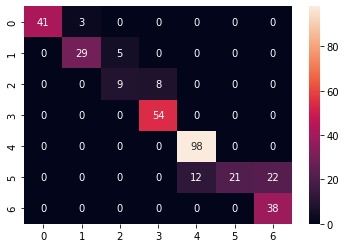

In [28]:
X_3 = d_3.drop(columns = ['label']).values
y_3 = d_3['label'].values
Scores=My_model(X_3,y_3)



2049
Epoch 1/500
79/82 [===========================>..] - ETA: 0s - loss: 5.5954 - accuracy: 0.4380
Epoch 1: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 6s 61ms/step - loss: 5.4565 - accuracy: 0.4461 - val_loss: 0.7311 - val_accuracy: 0.7108
Epoch 2/500
80/82 [============================>.] - ETA: 0s - loss: 1.1631 - accuracy: 0.6737
Epoch 2: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 3s 33ms/step - loss: 1.1620 - accuracy: 0.6728 - val_loss: 0.4374 - val_accuracy: 0.8529
Epoch 3/500
82/82 [==============================] - ETA: 0s - loss: 0.7348 - accuracy: 0.7770
Epoch 3: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 2s 28ms/step - loss: 0.7348 - accuracy: 0.7770 - val_loss: 0.6137 - val_accuracy: 0.8039
Epoch 4/500
81/82 [============================>.] - ETA: 0s - loss: 0.5167 - accur

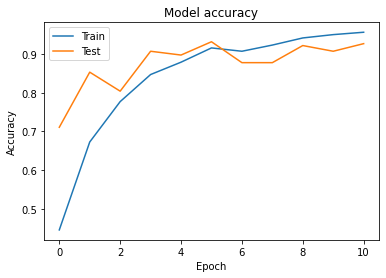

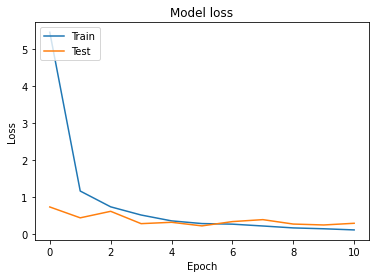

11/11 [==============================] - 0s 6ms/step
Accuracy =  0.9470588235294117
f1 micro =  0.9470588235294117
f1 macro =  0.9472418387130447
f1 all =  [0.98850575 0.97142857 0.90909091 0.96153846 0.93121693 0.93220339
 0.93670886]
prec micro =  0.9470588235294117
prec macro =  0.946347472697647
prec all =  [1.         0.94444444 0.9375     1.         0.96703297 0.87301587
 0.90243902]
recall micro =  0.9470588235294117
recall macro =  0.9510278555107012
recall all =  [0.97727273 1.         0.88235294 0.92592593 0.89795918 1.
 0.97368421]
AxesSubplot(0.125,0.125;0.62x0.755)


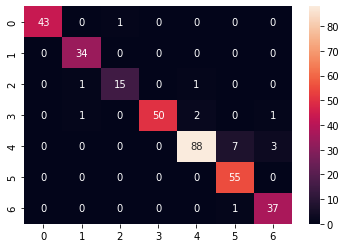

In [29]:
X_4 = d_4.drop(columns = ['label']).values
y_4 = d_4['label'].values
Scores=My_model(X_4,y_4)



1921
Epoch 1/500
81/82 [============================>.] - ETA: 0s - loss: 5.2855 - accuracy: 0.3642
Epoch 1: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 3s 30ms/step - loss: 5.2630 - accuracy: 0.3640 - val_loss: 0.6841 - val_accuracy: 0.7990
Epoch 2/500
82/82 [==============================] - ETA: 0s - loss: 1.4752 - accuracy: 0.5674
Epoch 2: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 5s 64ms/step - loss: 1.4752 - accuracy: 0.5674 - val_loss: 0.4738 - val_accuracy: 0.8775
Epoch 3/500
80/82 [============================>.] - ETA: 0s - loss: 0.9062 - accuracy: 0.7113
Epoch 3: saving model to sayel
INFO:tensorflow:Assets written to: sayel/assets
82/82 [==============================] - 2s 30ms/step - loss: 0.9007 - accuracy: 0.7120 - val_loss: 0.3236 - val_accuracy: 0.8333
Epoch 4/500
80/82 [============================>.] - ETA: 0s - loss: 0.6007 - accur

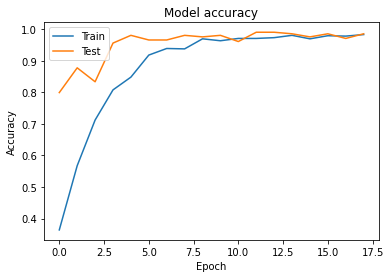

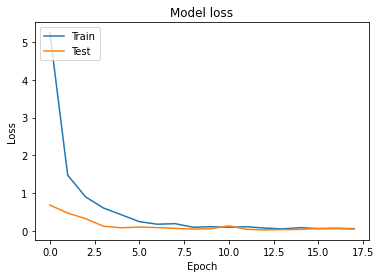

11/11 [==============================] - 0s 10ms/step
Accuracy =  0.9852941176470589
f1 micro =  0.9852941176470589
f1 macro =  0.9887558651483946
f1 all =  [1.         1.         1.         0.99082569 0.97916667 0.96428571
 0.98701299]
prec micro =  0.9852941176470589
prec macro =  0.9862207967471127
prec all =  [1.         1.         1.         0.98181818 1.         0.94736842
 0.97435897]
recall micro =  0.9852941176470589
recall macro =  0.99157169361251
recall all =  [1.         1.         1.         1.         0.95918367 0.98181818
 1.        ]
AxesSubplot(0.125,0.125;0.62x0.755)


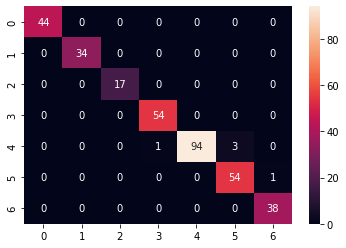

In [30]:
X_5 = d_5.drop(columns = ['label']).values
y_5 = d_5['label'].values
Scores=My_model(X_5,y_5)

